## Assignment 4
### Sentiment Analysis
## Prince
## 101916056
## 3cs10

In [2]:
import pandas as pd

data = pd.read_pickle('corpus_prince.pkl')
data

,transcript
louis,introfade the music out lets roll hold there l...
dave,this is dave he tells dirty jokes for a living...
ricky,hello hello how you doing great thank you wow ...
Jim-G,thank you thank you oh my gosh thank you so mu...
bill,all right thank you thank you very much thank...
Jim-J,ladies and gentlemen please welcome to the ...
john,armed with boyish charm and a sharp wit the fo...
George,recorded on january – state theatre new bruns...
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...


In [2]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
louis,intro\nfade the music out. lets roll. hold the...,0.052569,0.521885
dave,this is dave. he tells dirty jokes for a livin...,-0.003038,0.515310
ricky,hello. hello! how you doing? great. thank you....,0.053749,0.507818
bo,© scraps from the loft. all rights reserved.,0.000000,0.000000
bill,"[cheers and applause] all right, thank you! th...",0.007092,0.544106
jim,[car horn honks] [audience cheering] [announce...,0.034777,0.531868
john,"armed with boyish charm and a sharp wit, the f...",0.077674,0.489270
hasan,© scraps from the loft. all rights reserved.,0.000000,0.000000
ali,"ladies and gentlemen, please welcome to the st...",0.070239,0.478434
anthony,"thank you. thank you. thank you, san francisco...",0.048647,0.563831


scatter plot of Polarity and Subjectivity is created here

In [5]:
full_name=data.index

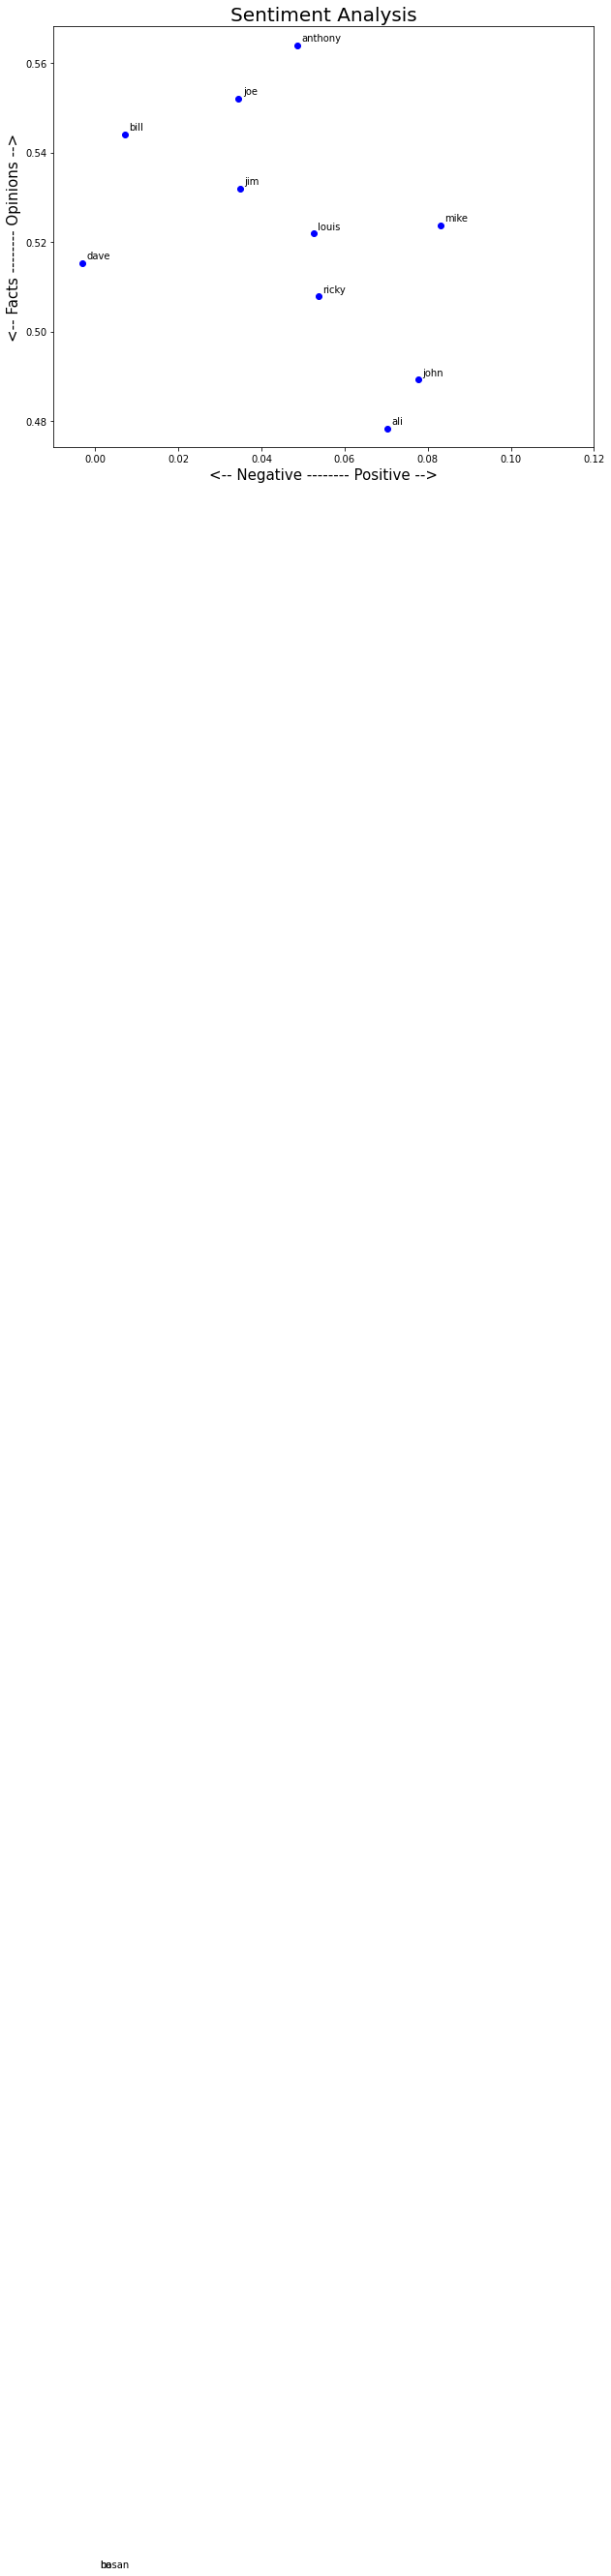

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8] # Set width to 10 inches and height to 8 inches

for index, comedian in enumerate(data.index):
    #print(comedian)
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, comedian, fontsize=10) # Offset the label to avoid overlap of label & dot
    plt.xlim(-.01, .12) 

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

In [10]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    length = len(text) # Calculate length of text
    size = math.floor(length / n) # Calculate size of each chunk of text 
    # Calculate the starting points of each chunk of text
    start = np.arange(0, length, size) # numpy.arange([start, ]stop, [step]) ...Return evenly spaced values within a given interval.
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list



# Let's create a list of lists that'll hold all of the pieces of text of all the comedians
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

In [11]:
list_pieces

[['intro\nfade the music out. lets roll. hold there. lights. do the lights. thank you. thank you very much. i appreciate that. i dont necessarily agree with you, but i appreciate very much. well, this is a nice place. this is easily the nicest place for many miles in every direction. thats how you compliment a building and shit on a town with one sentence. it is odd around here, as i was driving here. there doesnt seem to be any difference between the sidewalk and the street for pedestrians here. people just kind of walk in the middle of the road. i love traveling and seeing all the different parts of the country. i live in new york. i live in a– theres no value to your doing that at all. the old lady and the dog\ni live– i live in new york. i always– like, theres this old lady in my neighborhood, and shes always walking her dog. shes always just– shes very old. she just stands there just being old, and the dog just fights gravity every day, just– the two of them, its really– the dogs 

#### polarity for each piece of text is calculated here 

In [12]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0611880068716006,
  0.03785143318691113,
  0.10172838992283434,
  -0.010163618587531639,
  0.10351220172104315,
  0.009644626861607995,
  0.11303969874526515,
  0.11409789253539251,
  0.012700619416044962,
  -0.021817460317460305],
 [-0.05093449586407334,
  -0.07315103085651031,
  0.05549913257778425,
  0.05083695003975616,
  -0.01850989187945709,
  0.09356907761402139,
  -0.12361289561556331,
  -0.09771464646464648,
  -0.047836259984147304,
  0.2066183737646002],
 [0.14867061950395286,
  0.15904825265719363,
  0.0036027148859007242,
  -0.015147480443533097,
  0.13144796622519392,
  -0.0031585156585156845,
  0.05533455217921236,
  0.026417961555156667,
  -0.017494089834515385,
  0.08117742046313474],
 [0.0, -0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [-0.032260689190037016,
  -0.000929723298144352,
  0.01577290764790764,
  0.00653113020537262,
  -0.05523722676500453,
  0.07530968744886271,
  0.00780637475949975,
  -0.02085300355774494,
  -0.027837090509962862,
  0.0952291577291

### additional assignmnent 

#### plot for single comedian louis

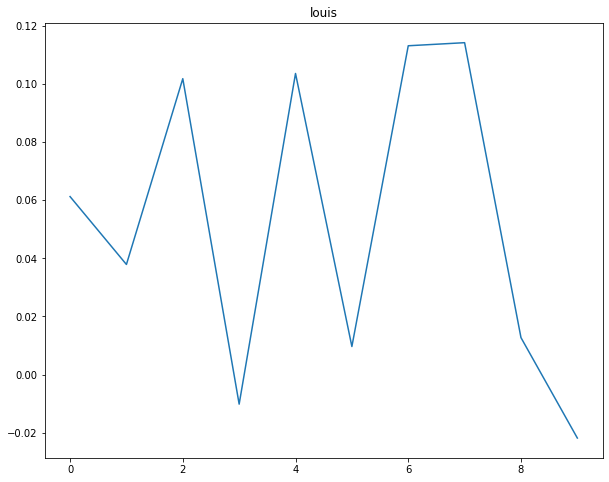

In [15]:
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.show()

#### plot for all comedians is created in here

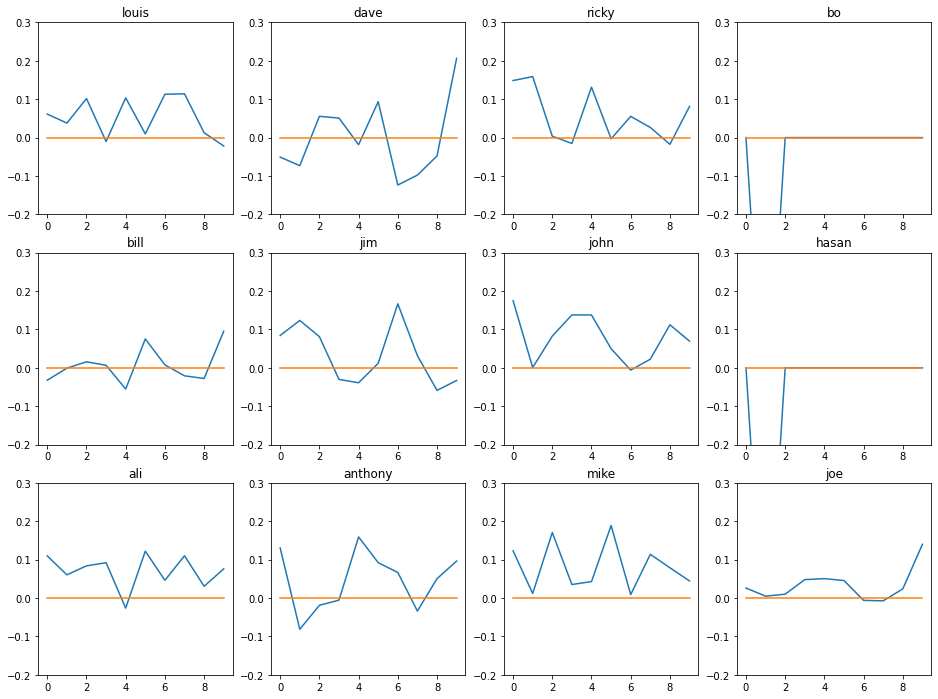

In [17]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(comedian)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

# Interpretation for above 


Louis C.K stays generally positive throughout her routine. Similar comedians are mike. and ali.

Some pretty different patterns here like Dave Chappelle who has some pretty down moments in his routine and Bo Burnham who gets happier as time passes.